###### British Airways Virtual Internship

# Data preparation

Now that we have raw data scraped from the website, we have to prepare the dataset for analysis. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.reset_option('display.max_colwidth') 
# pd.set_option('display.max_colwidth', None)

In [3]:
# load data
reviews_df = pd.read_csv('data/reviews_raw.csv', )

In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   3589 non-null   object 
 1   country                 3587 non-null   object 
 2   time                    3589 non-null   object 
 3   verified_trip           2064 non-null   object 
 4   review_text             3589 non-null   object 
 5   type_of_traveller       2819 non-null   object 
 6   cabin_flown             3587 non-null   object 
 7   route                   2814 non-null   object 
 8   date_flown              2811 non-null   object 
 9   seat_comfort            3483 non-null   float64
 10  cabin_staff_service     3473 non-null   float64
 11  food_and_beverages      3231 non-null   float64
 12  ground_service          2748 non-null   float64
 13  value_for_money         3589 non-null   int64  
 14  inflight_entertainment  2508 non-null   

In [5]:
reviews_df.shape

(3589, 18)

In [6]:
reviews_df.head(5)

,title,country,time,verified_trip,review_text,type_of_traveller,cabin_flown,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,inflight_entertainment,wifi_and_connectivity,recommended,review_score
0,"""Luggage are still in Glasgow""",United States,30th June 2023,Trip Verified,Came from Glasgow to London and took connectin...,Family Leisure,Economy Class,Glasgow to London,June 2023,1.0,1.0,NaN,1.0,1,NaN,NaN,no,1
1,"""whole experience was terrible""",United Arab Emirates,29th June 2023,Trip Verified,My flight on on 12 May 2023 got delayed an hou...,Solo Leisure,Economy Class,Dubai to Keflavik via London,May 2023,1.0,1.0,NaN,1.0,1,NaN,NaN,no,1
2,"""preferred to fly on easyJet""",United Kingdom,29th June 2023,Not Verified,Cairo is a 5 hour flight and BA considers it t...,Couple Leisure,Economy Class,Cairo to London,June 2023,1.0,1.0,1.0,2.0,1,1.0,1.0,no,2
3,"""stated it is not their fault""",United Kingdom,27th June 2023,Trip Verified,After travelling London to Madrid with British...,Solo Leisure,Economy Class,London to Madrid,May 2023,3.0,3.0,3.0,1.0,1,NaN,NaN,no,1
4,"""luggage was mis-tagged in Dallas""",United States,27th June 2023,Trip Verified,My luggage was mis-tagged in Dallas on my way ...,Family Leisure,Economy Class,London to Cairo,June 2023,1.0,1.0,NaN,1.0,1,NaN,NaN,no,1


## Missing values

In [7]:
reviews_df.review_score = reviews_df.review_score.apply(lambda x: x.strip()).replace('na', np.nan)

In [8]:
reviews_df.isna().sum()

title                        0
country                      2
time                         0
verified_trip             1525
review_text                  0
type_of_traveller          770
cabin_flown                  2
route                      775
date_flown                 778
seat_comfort               106
cabin_staff_service        116
food_and_beverages         358
ground_service             841
value_for_money              0
inflight_entertainment    1081
wifi_and_connectivity     3017
recommended                  0
review_score                 5
dtype: int64

## Data type

In [9]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   3589 non-null   object 
 1   country                 3587 non-null   object 
 2   time                    3589 non-null   object 
 3   verified_trip           2064 non-null   object 
 4   review_text             3589 non-null   object 
 5   type_of_traveller       2819 non-null   object 
 6   cabin_flown             3587 non-null   object 
 7   route                   2814 non-null   object 
 8   date_flown              2811 non-null   object 
 9   seat_comfort            3483 non-null   float64
 10  cabin_staff_service     3473 non-null   float64
 11  food_and_beverages      3231 non-null   float64
 12  ground_service          2748 non-null   float64
 13  value_for_money         3589 non-null   int64  
 14  inflight_entertainment  2508 non-null   

In [10]:
reviews_df.value_for_money = reviews_df.value_for_money.astype(np.float16)

In [11]:
reviews_df.review_score = pd.to_numeric(reviews_df.review_score)

In [12]:
# memory optimization
for column in reviews_df.select_dtypes(include='float').columns:
    reviews_df[column] = reviews_df[column].astype(np.float16)
reviews_df.review_score = reviews_df.review_score.astype(np.float16)

## Format dates

In [13]:
from datetime import datetime as dt

In [14]:
# removing suffixes on dates to convert to datetime
# also correcting incomplete name of the month found ('Augu')
reviews_df['time'] = reviews_df.time.apply(lambda x: x.replace('st', '').replace('nd', '').replace('rd', '').replace('th', '').replace('Augu ', 'August '))

In [15]:
reviews_df['time'] = pd.to_datetime(reviews_df.time, format="%d %B %Y")
reviews_df['date_flown'] = pd.to_datetime(reviews_df.date_flown, format='%B %Y')

## Route (incomplete)

- TODO: There are variants of the same place (e.g. London Heathrow and LHR) 

In [16]:
import re

### Origin

In [17]:
reviews_df['route_from'] = reviews_df.route.apply(lambda x: re.search(r'.*?(?=\s{1}to\s{1}|-|\s{1}\/\s{1})', x) if isinstance(x, str) else np.nan).apply(lambda x: x.group(0) if isinstance(x, re.Match) else np.nan)

In [18]:
for i in reviews_df[(reviews_df.route_from.isnull()) & (~reviews_df.route.isnull())].index:
    match = re.search(r'^\S+?(?=\s+?)', reviews_df.loc[i, 'route'])
    if match:
        reviews_df.loc[i, 'route_from'] = match.group()

In [19]:
reviews_df.route_from.dropna().unique()

array(['Glasgow', 'Dubai', 'Cairo', 'London', 'New Orleans', 'Heathrow',
       'Amman', 'London City', 'Amsterdam', 'London Heathrow',
       'Marseille', 'Bucharest', 'Gatwick', 'Dublin', 'Tokyo',
       'San Francisco', 'Santiago', 'Seattle', 'Sydney via Singapore',
       'Athens', 'Vancouver', 'Boston', 'Nice', 'Las Vegas', 'Lisbon',
       'Dallas', 'Los Angeles', 'Atlanta', 'Sydney', 'New York',
       'Singapore', 'Sweden', 'Bangalore', 'Brussels', 'Copenhagen',
       'Hong Kong', 'Santorini', 'Madrid', 'Faro', 'Belfast', 'Mumbai',
       'Mexico City', 'Barcelona', 'Marrakech', 'Miami', 'Johannesburg',
       'Munich', 'Zagreb', 'New York JFK', 'Geneva', 'Prague', 'Portland',
       'Lyon', 'Oslo', 'Islamabad', 'Edinburgh', 'Palma', 'Cape Town',
       'London Gatwick', 'Istanbul', 'Vienna', 'Doha', 'Keflavik',
       'Barbados', 'Denver', 'Montreal', 'Amman Jordan', 'Dusseldorf',
       'Milan', 'Baltimore', 'Larnaca', 'Orlando', 'Jersey', 'Gothenburg',
       'Manchester', 

### Destination

In [20]:
reviews_df['route_to'] = reviews_df.route.apply(lambda x: re.search(r'(?<=\s{1}to\s{1}).*?(?=(\s{1}via\s{1})|$)', x) if isinstance(x, str) else np.nan).apply(lambda x: x.group(0) if isinstance(x, re.Match) else np.nan)

In [21]:
for i in reviews_df[(reviews_df.route_to.isnull()) & (~reviews_df.route.isnull())].index:
    match = re.search(r'(?<=-).*?(?=(\s{1}via\s{1})|\s*?$|( return))', reviews_df.loc[i, 'route'])
    if match:
        reviews_df.loc[i, 'route_to'] = match.group()
    else:
        match = re.search(r'(?<=\s{1}\/\s{1}).*?(?=(\s{1}via\s{1})|\s*?$|(\s{1}return))', reviews_df.loc[i, 'route'])
        if match:
            reviews_df.loc[i, 'route_to'] = match.group()

In [22]:
for i in reviews_df[(reviews_df.route_to.isnull()) & (~reviews_df.route.isnull())].index:
    match = re.search(r'(?<=\s).*', reviews_df.loc[i, 'route'])
    if match:
        reviews_df.loc[i, 'route_to'] = match.group()

In [23]:
reviews_df.route_to.dropna().unique()

array(['London', 'Keflavik', 'Madrid', 'Cairo', 'Amman', 'Bodrum',
       'Ibiza', 'Washington', 'Kalamata', 'Funchal ', 'Seattle',
       'London ', 'Dallas', 'Venice', 'London City', 'Manchester', 'Nice',
       'London Heathrow ', 'Edinburgh', 'Durban', 'London Heathrow',
       'Barcelona', 'Santorini', 'Mumbai', 'Larnaca', 'New York',
       'Valencia', 'Glasgow', 'Malaga ', 'San Francisco', 'Belfast',
       'Faro', 'Los Angeles', 'Zagreb', 'Toronto', 'Denver', 'Hong Kong',
       'Malaga', 'Gatwick', 'Heathrow', 'Atlanta', 'Copenhagen', 'Malta',
       'Chicago', 'Amsterdam', 'Lanzarote', 'Marrakech', 'Algiers',
       'Munich', 'Nassau', 'Belfast City', 'Dubrovnik', 'Orlando',
       'Dubai', 'Arlanda Stockholm', 'Tel Aviv', 'Milan Malpensa',
       'Istanbul', 'Las Vegas', 'Singapore ', 'Lyon', 'Gatwick ',
       'Buenos Aires', 'Vancouver', 'Johannesburg', 'Male', 'Vienna',
       'Alicante', 'Cape Town', 'Dublin', 'Athens Greece ',
       'San francisco', 'Barbados', 'Frankf

### Transit

In [24]:
reviews_df['route_via'] = reviews_df.route.apply(lambda x: re.search(r'(?<=\s{1}via\s{1}).*', x) if isinstance(x, str) else np.nan).apply(lambda x: x.group(0) if isinstance(x, re.Match) else np.nan)

In [25]:
reviews_df.route_via.dropna().unique()

array(['London', 'London Heathrow', 'Heathrow',
       'Singapore to London Heathrow ', 'Singapore', 'London, ', 'Doha',
       'Los Angeles', 'London ', 'Toronto / London', 'Gatwick',
       'Chicago / London', 'Dublin', 'London / Seattle', 'Miami / Madrid',
       'Chicago', 'London / Singapore', 'Copenhagen ',
       'Singapore / London', 'Barcelona', 'Johannesburg / Heathrow',
       'Geneva', 'London Heathrow ', 'Heathrow/Gatwick', 'St. Lucia',
       'London / Johannesburg', 'london', 'LHR', 'LGW', 'SIN',
       'LAD & ABV', 'MAD', 'JNB', 'BKK', 'LCY', 'SYD', 'PHL', 'BAH / LHR',
       'KUL', 'ORD', 'BAH', 'HEL', 'EDI', 'MIA', 'Madrid', 'Antigua',
       'SNN', 'LGW / LHR', 'Miami', 'Shannon', 'Nassau'], dtype=object)

### Further cleaning

In [26]:
pd.concat(
    (reviews_df.route_via, reviews_df.route_to, reviews_df.route_from)
    ).dropna().unique()

array(['London', 'London Heathrow', 'Heathrow',
       'Singapore to London Heathrow ', 'Singapore', 'London, ', 'Doha',
       'Los Angeles', 'London ', 'Toronto / London', 'Gatwick',
       'Chicago / London', 'Dublin', 'London / Seattle', 'Miami / Madrid',
       'Chicago', 'London / Singapore', 'Copenhagen ',
       'Singapore / London', 'Barcelona', 'Johannesburg / Heathrow',
       'Geneva', 'London Heathrow ', 'Heathrow/Gatwick', 'St. Lucia',
       'London / Johannesburg', 'london', 'LHR', 'LGW', 'SIN',
       'LAD & ABV', 'MAD', 'JNB', 'BKK', 'LCY', 'SYD', 'PHL', 'BAH / LHR',
       'KUL', 'ORD', 'BAH', 'HEL', 'EDI', 'MIA', 'Madrid', 'Antigua',
       'SNN', 'LGW / LHR', 'Miami', 'Shannon', 'Nassau', 'Keflavik',
       'Cairo', 'Amman', 'Bodrum', 'Ibiza', 'Washington', 'Kalamata',
       'Funchal ', 'Seattle', 'Dallas', 'Venice', 'London City',
       'Manchester', 'Nice', 'Edinburgh', 'Durban', 'Santorini', 'Mumbai',
       'Larnaca', 'New York', 'Valencia', 'Glasgow', 'Malag

## Verified review

In [27]:
reviews_df['verified_trip'].value_counts()

Trip Verified      1070
Verified Review     770
Not Verified        204
Unverified           20
Name: verified_trip, dtype: int64

In [28]:
reviews_df['verified_trip'] = np.where(
    reviews_df.verified_trip=='Verified Review', 'Trip Verified', np.where(
        reviews_df.verified_trip=='Unverified', 'Not Verified', reviews_df.verified_trip
    )
)

## Text 

In [29]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [30]:
# combine title and review body
cols = ['title', 'review_text']
reviews_df['title'] = reviews_df.title.str.strip('"')
reviews_df['title_body'] = reviews_df[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [31]:
def clean_tokenize_lemmatize(text):
    text = ''.join(char for char in text.strip().strip('British Airways customer review').lower() if not char.isdigit())
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    text = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    text = [w for w in text if not w in stop_words]
    
    pos = ['n', 'v', 'a', 'r', 's']
    for item in pos:
        text = [WordNetLemmatizer().lemmatize(w, pos=item) for w in text]
    
    return text

In [32]:
reviews_df['review_cleaned'] = reviews_df.title_body.apply(lambda x: clean_tokenize_lemmatize(x))

In [33]:
reviews_df

,title,country,time,verified_trip,review_text,type_of_traveller,cabin_flown,route,date_flown,seat_comfort,...,value_for_money,inflight_entertainment,wifi_and_connectivity,recommended,review_score,route_from,route_to,route_via,title_body,review_cleaned
0,Luggage are still in Glasgow,United States,2023-06-30,Trip Verified,Came from Glasgow to London and took connectin...,Family Leisure,Economy Class,Glasgow to London,2023-06-01,1.0,...,1.0,NaN,NaN,no,1.0,Glasgow,London,NaN,Luggage are still in Glasgow Came from Glasgow...,"[luggage, still, glasgow, come, glasgow, londo..."
1,whole experience was terrible,United Arab Emirates,2023-06-29,Trip Verified,My flight on on 12 May 2023 got delayed an hou...,Solo Leisure,Economy Class,Dubai to Keflavik via London,2023-05-01,1.0,...,1.0,NaN,NaN,no,1.0,Dubai,Keflavik,London,whole experience was terrible My flight on on ...,"[le, experience, terrible, flight, may, get, d..."
2,preferred to fly on easyJet,United Kingdom,2023-06-29,Not Verified,Cairo is a 5 hour flight and BA considers it t...,Couple Leisure,Economy Class,Cairo to London,2023-06-01,1.0,...,1.0,1.0,1.0,no,2.0,Cairo,London,NaN,preferred to fly on easyJet Cairo is a 5 hour ...,"[prefer, fly, easyjet, cairo, hour, flight, ba..."
3,stated it is not their fault,United Kingdom,2023-06-27,Trip Verified,After travelling London to Madrid with British...,Solo Leisure,Economy Class,London to Madrid,2023-05-01,3.0,...,1.0,NaN,NaN,no,1.0,London,Madrid,NaN,stated it is not their fault After travelling ...,"[fault, travel, london, madrid, british, airwa..."
4,luggage was mis-tagged in Dallas,United States,2023-06-27,Trip Verified,My luggage was mis-tagged in Dallas on my way ...,Family Leisure,Economy Class,London to Cairo,2023-06-01,1.0,...,1.0,NaN,NaN,no,1.0,London,Cairo,NaN,luggage was mis-tagged in Dallas My luggage wa...,"[luggage, mistagged, dallas, luggage, mistagge..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584,British Airways customer review,Canada,2012-08-29,NaN,YYZ to LHR - July 2012 - I flew overnight in p...,NaN,Premium Economy,NaN,NaT,4.0,...,4.0,4.0,NaN,yes,8.0,NaN,NaN,NaN,British Airways customer review YYZ to LHR - J...,"[yyz, lhr, july, fly, overnight, premium, econ..."
3585,British Airways customer review,United Kingdom,2012-08-28,NaN,LHR to HAM. Purser addresses all club passenge...,NaN,Business Class,NaN,NaT,4.0,...,3.0,0.0,NaN,yes,9.0,NaN,NaN,NaN,British Airways customer review LHR to HAM. Pu...,"[lhr, ham, purser, address, club, passenger, n..."
3586,British Airways customer review,United Kingdom,2011-10-12,NaN,My son who had worked for British Airways urge...,NaN,Economy Class,NaN,NaT,NaN,...,4.0,NaN,NaN,yes,5.0,NaN,NaN,NaN,British Airways customer review My son who had...,"[son, work, british, airway, urge, fly, britis..."
3587,British Airways customer review,United States,2011-10-11,NaN,London City-New York JFK via Shannon on A318 b...,NaN,Premium Economy,NaN,NaT,1.0,...,1.0,0.0,NaN,no,4.0,NaN,NaN,NaN,British Airways customer review London City-Ne...,"[london, citynew, york, jfk, via, shannon, rea..."


## Resulting dataframe

In [34]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   title                   3589 non-null   object        
 1   country                 3587 non-null   object        
 2   time                    3589 non-null   datetime64[ns]
 3   verified_trip           2064 non-null   object        
 4   review_text             3589 non-null   object        
 5   type_of_traveller       2819 non-null   object        
 6   cabin_flown             3587 non-null   object        
 7   route                   2814 non-null   object        
 8   date_flown              2811 non-null   datetime64[ns]
 9   seat_comfort            3483 non-null   float16       
 10  cabin_staff_service     3473 non-null   float16       
 11  food_and_beverages      3231 non-null   float16       
 12  ground_service          2748 non-null   float16 

# Data analysis

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

## Customer profile

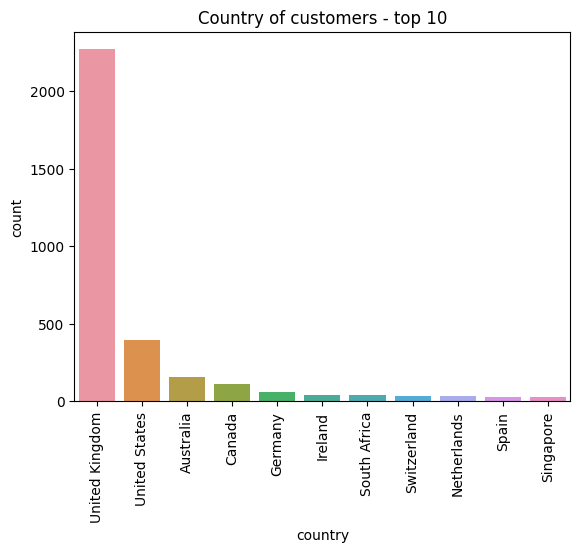

In [36]:
country_count = reviews_df.groupby('country').agg({'title':'count'}).rename(columns={'title':'count'}).sort_values('count', ascending=False).reset_index()
country_count
sns.barplot(data=country_count[:11], x='country', y='count')
plt.xticks(rotation=90)
plt.title('Country of customers - top 10')
plt.show()

## Trip profile

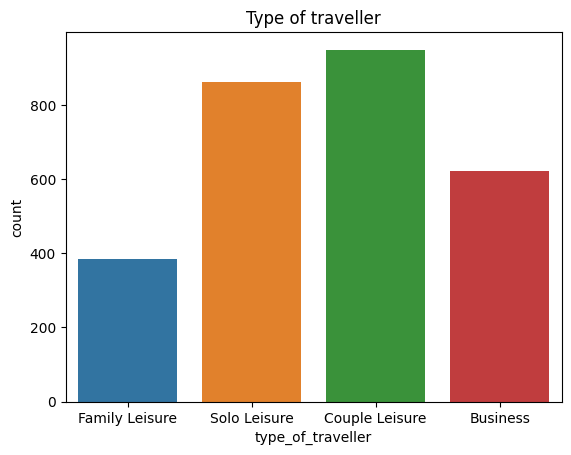

In [37]:
sns.countplot(data=reviews_df, x='type_of_traveller')
plt.title('Type of traveller')
plt.show()

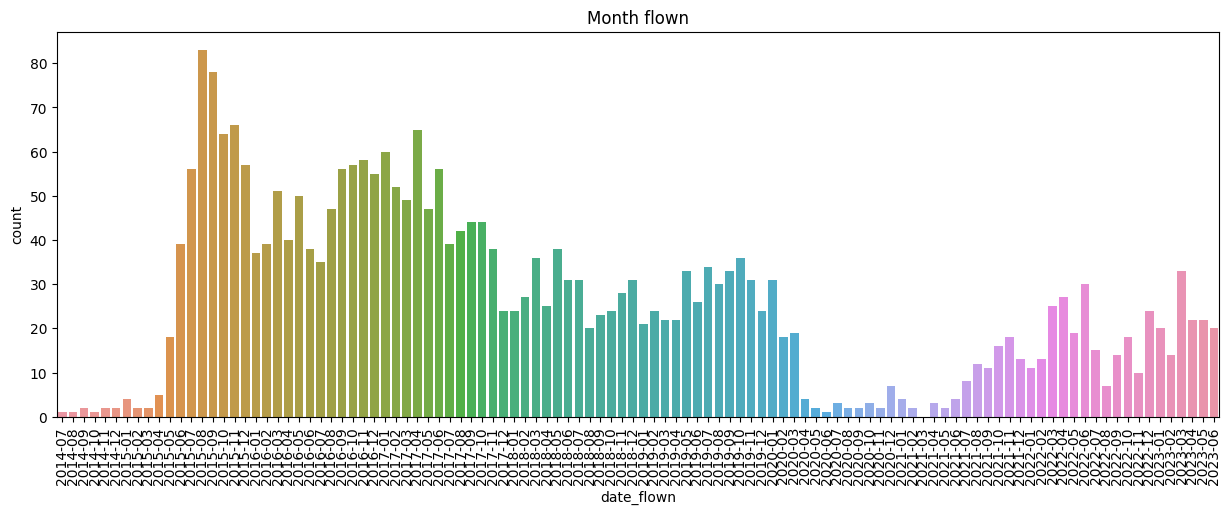

In [38]:
date_flown_df = reviews_df.groupby('date_flown').agg({'title':'count'}).rename(columns={'title':'count'}).reset_index()
date_flown_df.date_flown = date_flown_df.date_flown.dt.strftime('%Y-%m')
months = pd.date_range(start='2014-07-01', end='2023-06-30', freq='MS').strftime('%Y-%m')
zeros = pd.DataFrame({month:0 for month in months if month not in list(date_flown_df.date_flown)}, index=[0]).T.reset_index().rename(columns={0:'count', 'index':'date_flown'})
date_flown_df = pd.concat((date_flown_df, zeros), axis=0).sort_values('date_flown')

sns.barplot(data=date_flown_df, x='date_flown', y='count')
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title('Month flown')
plt.show()

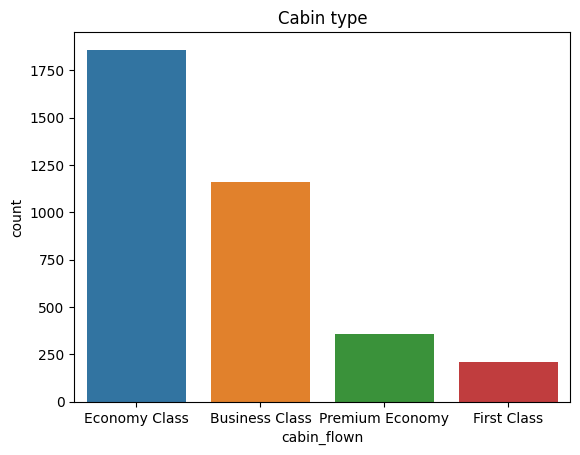

In [39]:
sns.countplot(data=reviews_df, x='cabin_flown')
plt.title('Cabin type')
plt.show()

## Review profile

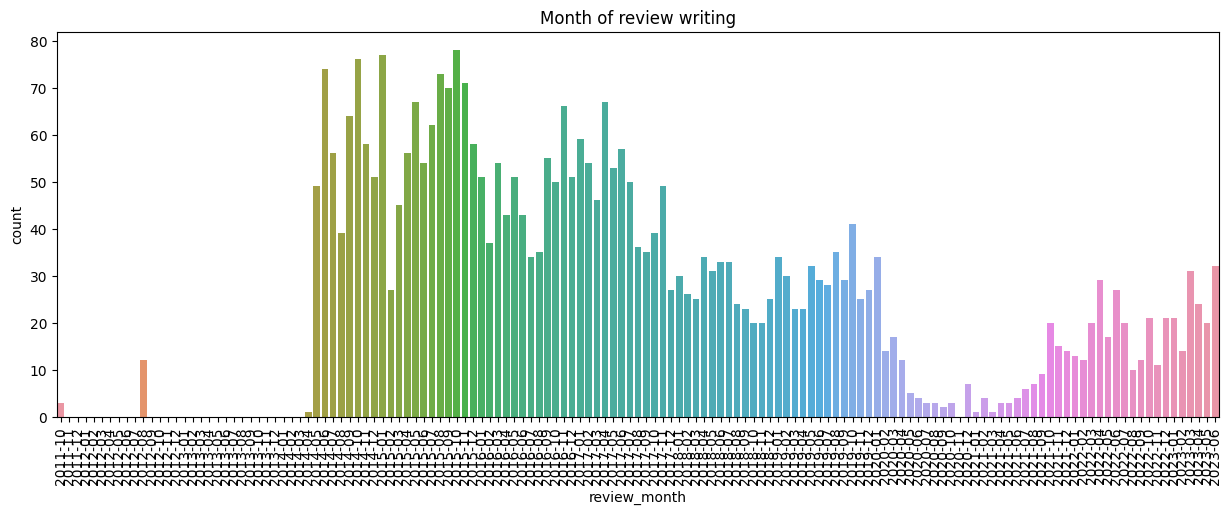

In [40]:
review_time_df = reviews_df.copy().sort_values('time')
review_time_df['review_month'] = review_time_df.time.dt.strftime('%Y-%m')
review_time_df = review_time_df.groupby('review_month').agg({'title':'count'}).rename(columns={'title':'count'}).reset_index().sort_values('review_month')
months = pd.date_range(start='2011-10-01', end='2023-06-30', freq='MS').strftime('%Y-%m')
zeros = pd.DataFrame({month:0 for month in months if month not in list(review_time_df.review_month)}, index=[0]).T.reset_index().rename(columns={0:'count', 'index':'review_month'})
review_time_df = pd.concat((review_time_df, zeros), axis=0).sort_values('review_month')

sns.barplot(data=review_time_df, x='review_month', y='count')
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title('Month of review writing')
plt.show()

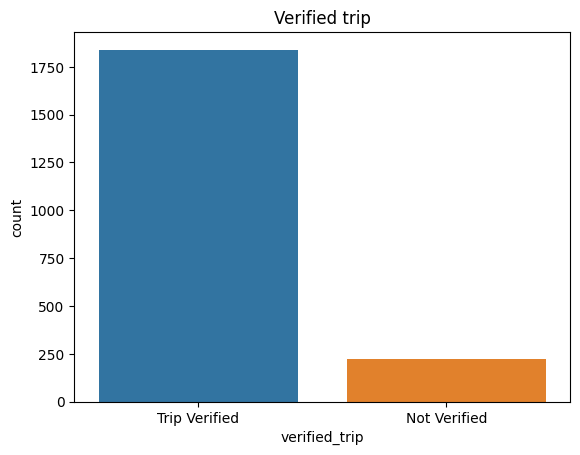

In [41]:
sns.countplot(data=reviews_df, x='verified_trip')
plt.title('Verified trip')
plt.show()

## Distribution of review scores

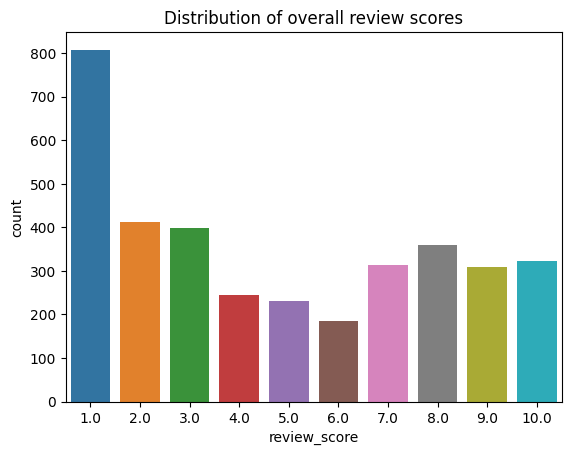

In [42]:
sns.countplot(data=reviews_df.sort_values('review_score'), x='review_score')
plt.title('Distribution of overall review scores')
plt.show()

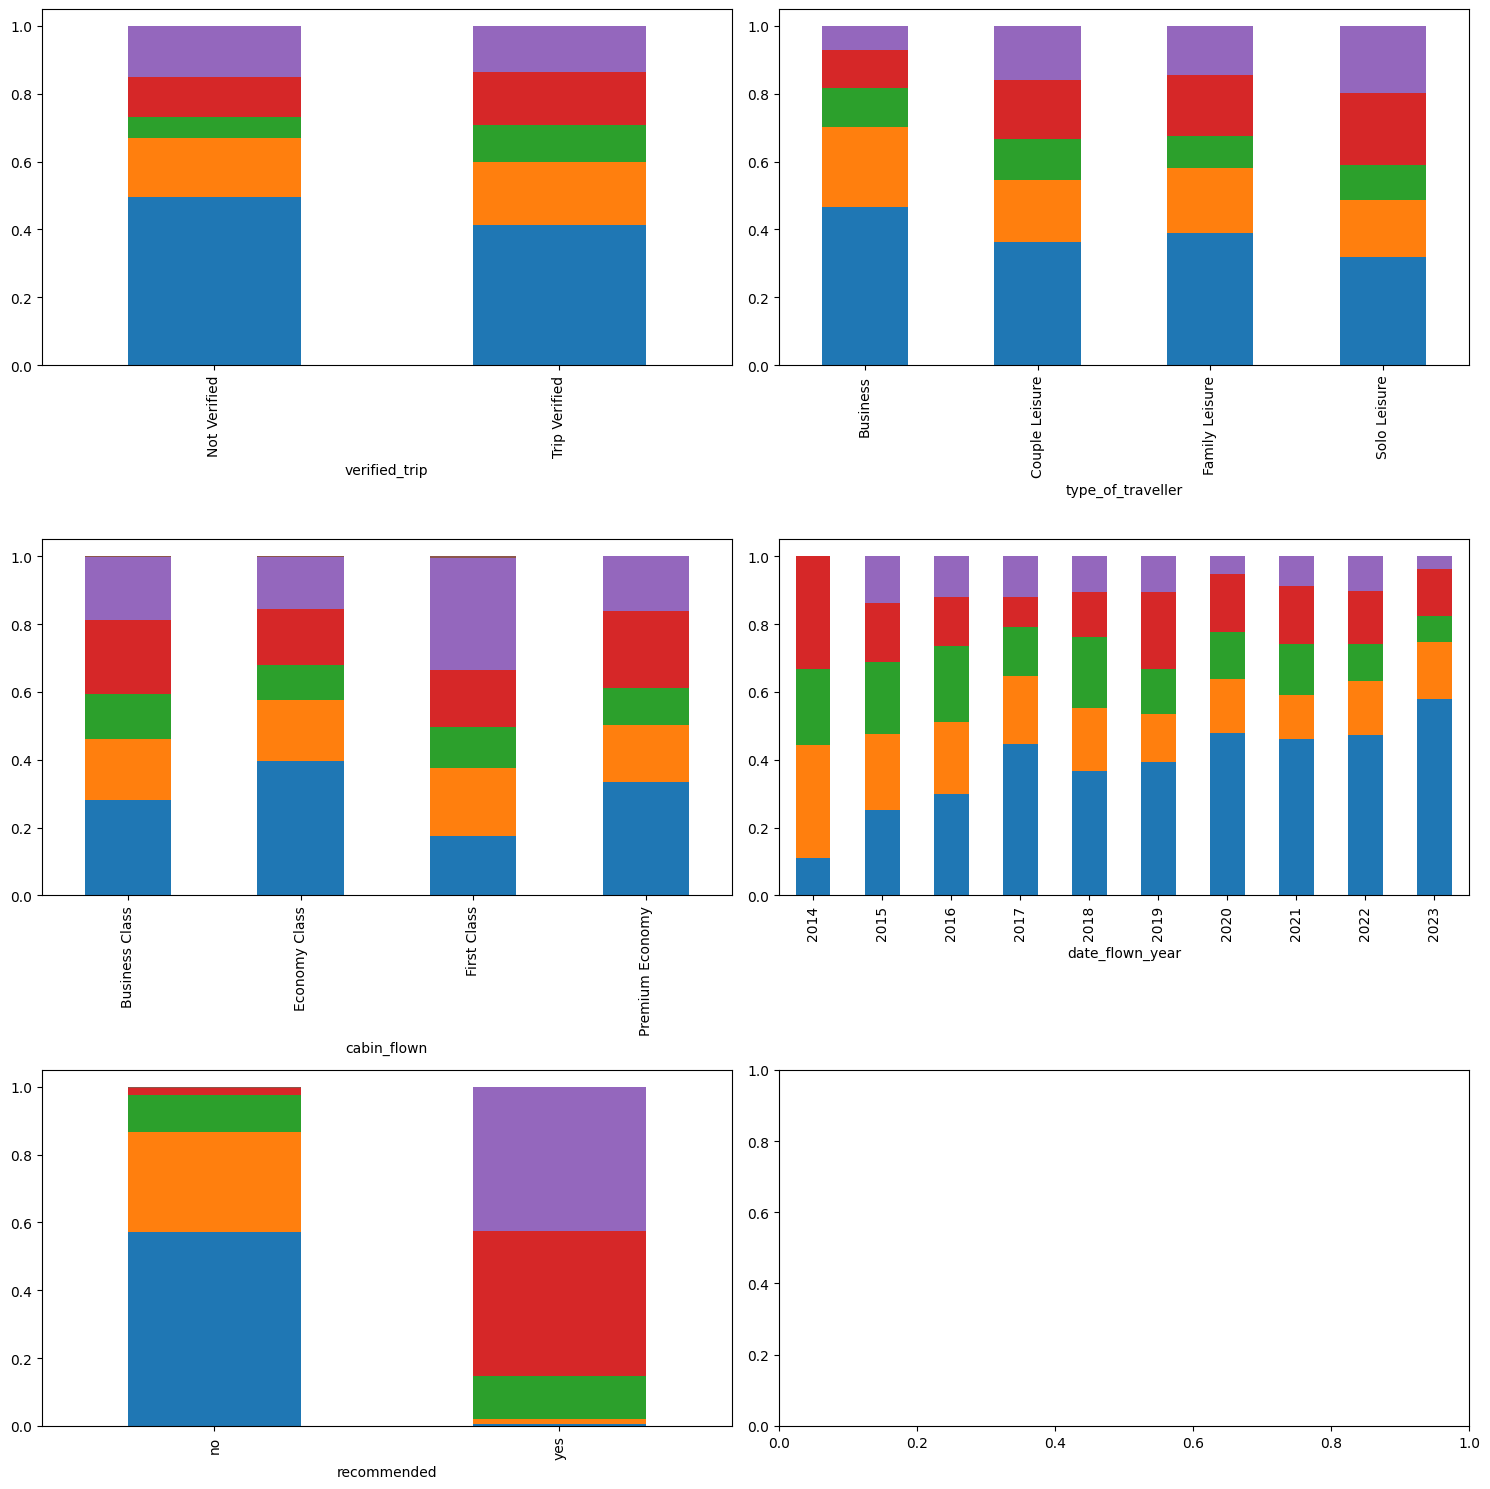

In [43]:
reviews_df['date_flown_year'] = reviews_df.date_flown.dt.strftime('%Y')
reviews_df['review_score_cat'] = np.where(
    reviews_df.review_score<=2, '1-2', np.where(
        reviews_df.review_score<=4, '3-4', np.where(
            reviews_df.review_score<=6, '5-6', np.where(
                reviews_df.review_score<=8, '7-8', np.where(
                    reviews_df.review_score>=9, '9-10', 'na'
                )
            )
        )
    )
)

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

cols = ['verified_trip', 'type_of_traveller', 'cabin_flown', 'date_flown_year', 'recommended']

for i, col in enumerate(cols):
    df_ = reviews_df.groupby([col, 'review_score_cat']).agg({'title':'count'}).unstack('review_score_cat')
    sum_ = df_.sum(axis=1)
    for col in df_.columns:
        df_.loc[:, col] = df_.loc[:, col] / sum_
    df_.plot(kind='bar', stacked=True, ax=axs[i//2, i%2])
    axs[i//2, i%2].get_legend().remove()

fig.tight_layout()

In [44]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   title                   3589 non-null   object        
 1   country                 3587 non-null   object        
 2   time                    3589 non-null   datetime64[ns]
 3   verified_trip           2064 non-null   object        
 4   review_text             3589 non-null   object        
 5   type_of_traveller       2819 non-null   object        
 6   cabin_flown             3587 non-null   object        
 7   route                   2814 non-null   object        
 8   date_flown              2811 non-null   datetime64[ns]
 9   seat_comfort            3483 non-null   float16       
 10  cabin_staff_service     3473 non-null   float16       
 11  food_and_beverages      3231 non-null   float16       
 12  ground_service          2748 non-null   float16 

## Correlation between review categories and overall review score

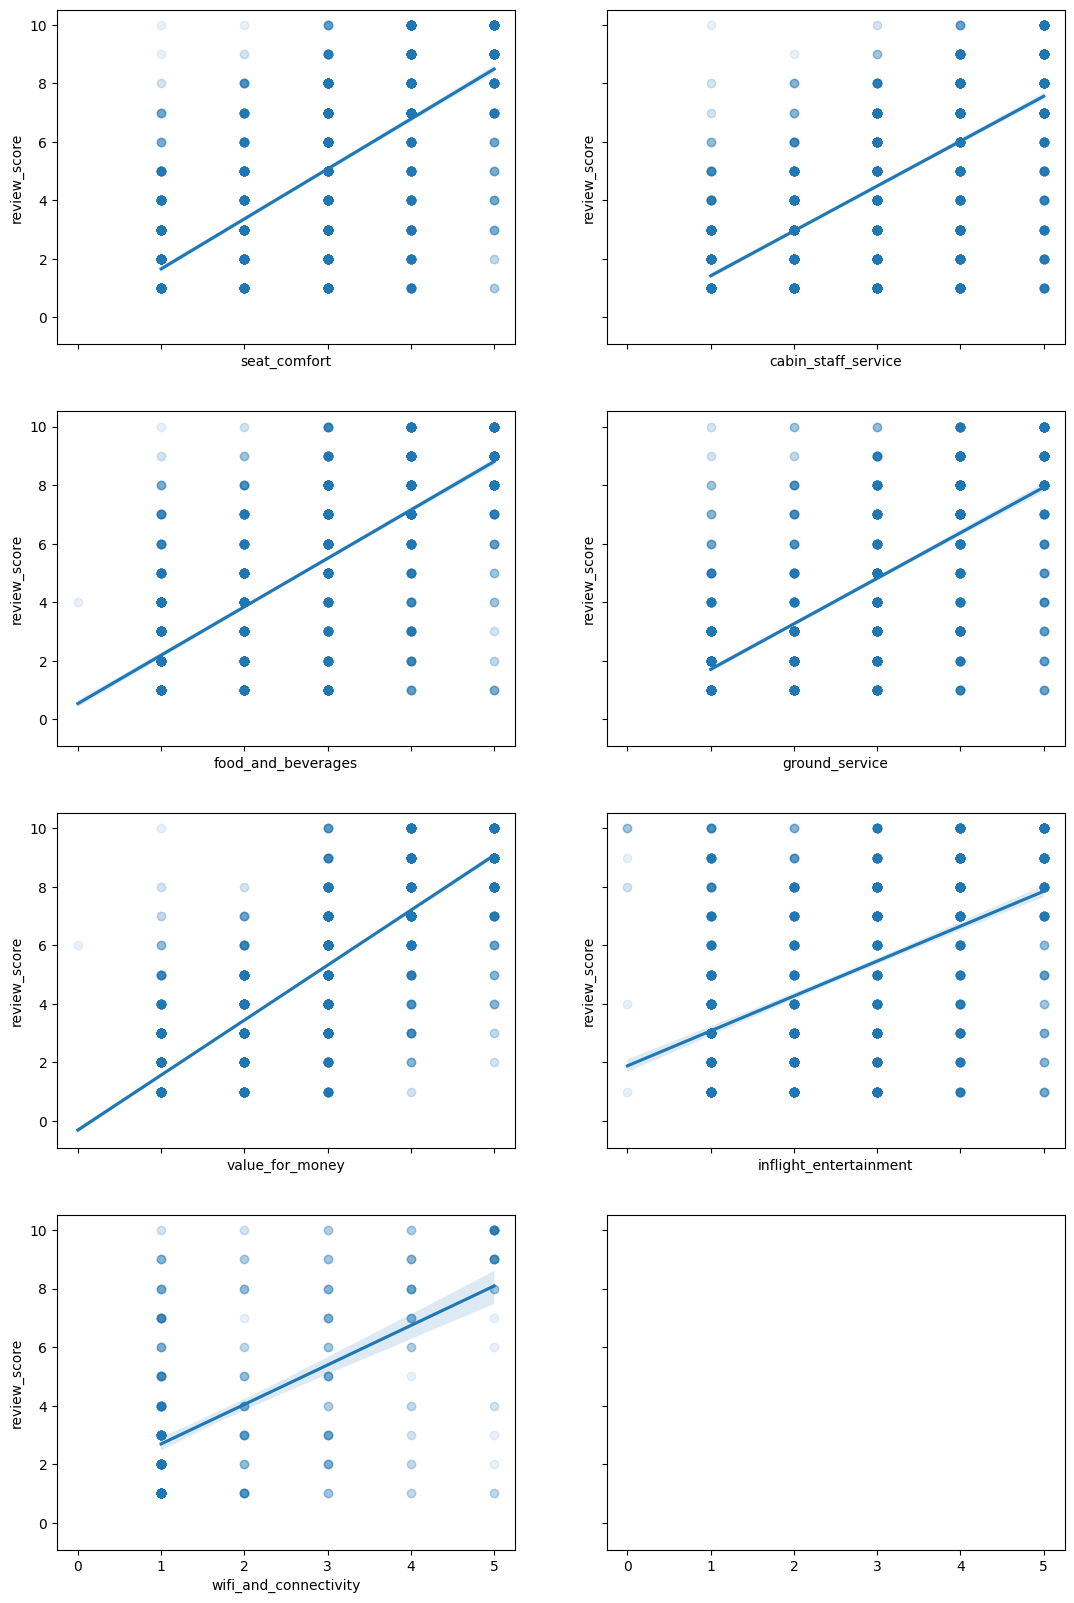

In [45]:
cols = ['seat_comfort', 'cabin_staff_service', 'food_and_beverages', 'ground_service', 'value_for_money', 
        'inflight_entertainment', 'wifi_and_connectivity']

fig, axs = plt.subplots(4, 2, figsize=(13, 20), sharex=True, sharey=True)

for i, col in enumerate(cols):
    sns.regplot(
        data=reviews_df, x=f'{col}', y='review_score', ax=axs[i//2, i%2], 
        scatter_kws={'alpha':.1})

/tmp/ipykernel_5749/2242368606.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = reviews_df.corr()


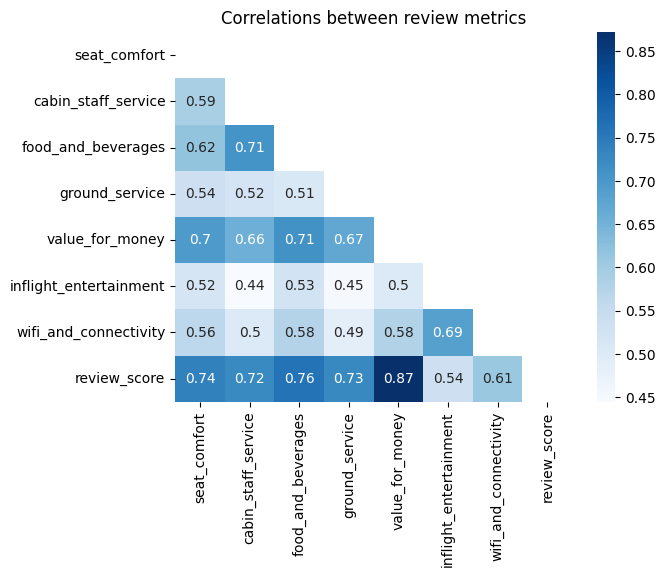

In [46]:
corr = reviews_df.corr()
mask = np.triu(corr)

sns.heatmap(corr, cmap='Blues', annot=True, mask=mask)
plt.title('Correlations between review metrics')
plt.show()

## Analyzing text data

### Most frequently appearing words 

In [76]:
# overall

review_text = pd.Series([item for row in reviews_df.review_cleaned.values for item in row])
print('overall')
print(review_text.value_counts()[:10])

cats = sorted(np.delete(reviews_df.review_score_cat.unique(), -1))
for cat in cats:
    df_ = reviews_df[reviews_df.review_score_cat == cat]
    review_text = pd.Series([item for row in df_.review_cleaned.values for item in row])
    print(f'\n{cat}')
    print(review_text.value_counts()[:10])



overall
flight     7713
seat       4912
ba         4895
service    3078
good       2868
fly        2571
food       2394
time       2385
crew       2256
get        2201
dtype: int64

1-2


flight     2964
ba         1999
seat       1630
service    1094
get        1042
fly        1009
british     941
airway      940
hour        906
airline     905
dtype: int64

3-4
flight     1215
ba          948
seat        944
service     577
fly         510
food        501
class       435
airway      430
get         427
british     427
dtype: int64

5-6
flight     830
seat       745
ba         595
good       392
service    344
crew       326
cabin      326
food       323
time       303
fly        289
dtype: int64

7-8
flight     1423
seat        999
good        994
ba          753
service     563
crew        546
food        537
time        495
cabin       430
fly         374
dtype: int64

9-10
flight     1269
good        687
ba          594
seat        589
crew        537
service     498
time        430
food        423
cabin       385
fly         383
dtype: int64


In [73]:
freq_words = ['flight', 'ba', 'seat', 'british', 'airway', 'fly', 'service']

### Word cloud

In [71]:
from wordcloud import WordCloud

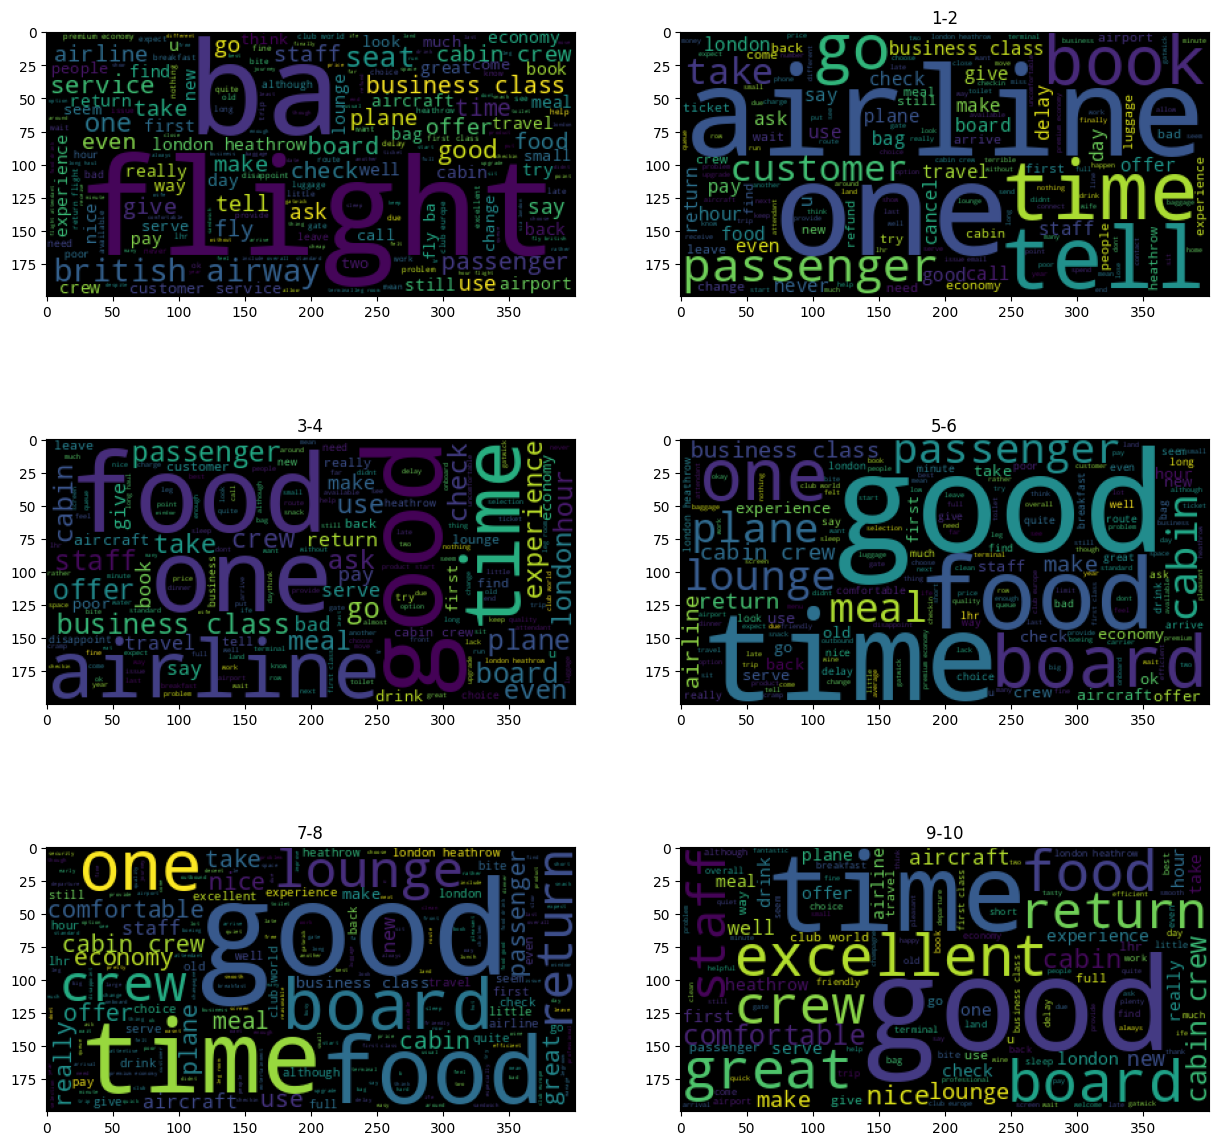

In [75]:
cats = sorted(np.delete(reviews_df.review_score_cat.unique(), -1))

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

review_text = ','.join([item for row in reviews_df.review_cleaned.values for item in row])
wc = WordCloud()
axs[0,0].imshow(wc.generate(review_text))
for i, cat in enumerate(cats):
    df_ = reviews_df[reviews_df.review_score_cat == cat]
    review_text = ','.join([item for row in df_.review_cleaned.values for item in row if item not in freq_words])
    wc = WordCloud()
    axs[(i+1)//2, (i+1)%2].imshow(wc.generate(review_text))
    axs[(i+1)//2, (i+1)%2].set_title(f"{cat}")

    

### LDA

In [91]:
import sklearn as skl

In [118]:
vectorizer = skl.feature_extraction.text.TfidfVectorizer(
    max_df=.8,
    min_df=.01
)
vectorized = pd.DataFrame(
    vectorizer.fit_transform(text).toarray(),
    columns=vectorizer.get_feature_names_out()
)
vectorized

,aa,able,absolute,absolutely,accept,acceptable,access,accommodate,across,actually,...,wouldnt,wrap,write,wrong,year,yes,yet,york,young,youre
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.073565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.081925,0.055343,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.144562,0.000000,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
3585,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
3586,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
3587,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.348125,0.0,0.0


In [119]:
from sklearn import decomposition

In [120]:
n_topics = 10
lda_model = decomposition.LatentDirichletAllocation(n_components=n_topics, max_iter=100)
lda_model.fit(vectorized)

LatentDirichletAllocation(max_iter=100)

In [121]:
topic_mixture = lda_model.transform(vectorized)

In [122]:
pd.DataFrame(topic_mixture)

,0,1,2,3,4,5,6,7,8,9
0,0.022771,0.022764,0.022764,0.795118,0.022764,0.022764,0.022764,0.022764,0.022764,0.022764
1,0.011958,0.011955,0.011955,0.892400,0.011955,0.011955,0.011955,0.011955,0.011955,0.011955
2,0.904746,0.010583,0.010583,0.010589,0.010583,0.010583,0.010583,0.010583,0.010583,0.010583
3,0.014622,0.014617,0.014617,0.868440,0.014617,0.014617,0.014617,0.014617,0.014617,0.014617
4,0.018315,0.018311,0.018311,0.835200,0.018311,0.018311,0.018311,0.018311,0.018311,0.018311
...,...,...,...,...,...,...,...,...,...,...
3584,0.866257,0.014860,0.014860,0.014863,0.014860,0.014860,0.014860,0.014860,0.014860,0.014860
3585,0.808379,0.021290,0.021290,0.021297,0.021290,0.021290,0.021290,0.021290,0.021290,0.021290
3586,0.014132,0.014120,0.014120,0.872911,0.014120,0.014120,0.014120,0.014120,0.014120,0.014120
3587,0.819231,0.020085,0.020085,0.020089,0.020085,0.020085,0.020085,0.020085,0.020085,0.020085


In [126]:
topics_df = pd.DataFrame(lda_model.components_, columns=vectorizer.get_feature_names_out()).T

for column in topics_df.columns:
    df_ = topics_df.sort_values(column, ascending=False)
    print(f'Topic {column}:')
    print(f'{df_[:20].index}\n')

Topic 0:
Index(['seat', 'good', 'ba', 'crew', 'food', 'service', 'cabin', 'class',
       'fly', 'time', 'business', 'economy', 'london', 'british', 'airway',
       'board', 'drink', 'airline', 'club', 'meal'],
      dtype='object')

Topic 1:
Index(['hit', 'bottom', 'clean', 'response', 'trip', 'last', 'lose', 'plane',
       'heathrow', 'fly', 'london', 'service', 'ba', 'jam', 'office', 'coffee',
       'ife', 'wine', 'cater', 'superior'],
      dtype='object')

Topic 2:
Index(['consist', 'vegetarian', 'nobody', 'respond', 'biscuit', 'advance',
       'basic', 'text', 'december', 'competitor', 'tasteless', 'cup', 'knee',
       'highly', 'wrap', 'embarrass', 'plastic', 'miserable', 'pasta', 'per'],
      dtype='object')

Topic 3:
Index(['ba', 'customer', 'book', 'hour', 'get', 'tell', 'cancel', 'delay',
       'call', 'airway', 'british', 'day', 'refund', 'check', 'service',
       'airline', 'london', 'bag', 'airport', 'would'],
      dtype='object')

Topic 4:
Index(['jam', 'office'

In [86]:
# from pprint import pprint

In [87]:
# num_topics = 10
# lda_model = gensim.models.LdaMulticore(
#     corpus=corpus, 
#     id2word=id2word,
#     num_topics=num_topics
# )

In [90]:
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

[(0,
  '0.018*"flight" + 0.013*"ba" + 0.012*"service" + 0.011*"seat" + '
  '0.010*"class" + 0.010*"business" + 0.008*"good" + 0.008*"london" + '
  '0.007*"one" + 0.007*"british"'),
 (1,
  '0.024*"ba" + 0.018*"seat" + 0.018*"flight" + 0.011*"fly" + 0.009*"food" + '
  '0.009*"time" + 0.008*"service" + 0.008*"class" + 0.007*"crew" + '
  '0.007*"cabin"'),
 (2,
  '0.023*"flight" + 0.017*"seat" + 0.013*"ba" + 0.011*"service" + 0.011*"fly" '
  '+ 0.010*"good" + 0.009*"food" + 0.008*"’" + 0.008*"class" + 0.007*"time"'),
 (3,
  '0.018*"flight" + 0.018*"seat" + 0.016*"ba" + 0.010*"service" + 0.009*"good" '
  '+ 0.007*"cabin" + 0.007*"one" + 0.007*"get" + 0.007*"class" + 0.007*"time"'),
 (4,
  '0.025*"flight" + 0.021*"seat" + 0.016*"ba" + 0.011*"british" + '
  '0.010*"airway" + 0.009*"service" + 0.009*"get" + 0.009*"fly" + '
  '0.008*"airline" + 0.008*"good"'),
 (5,
  '0.027*"flight" + 0.015*"seat" + 0.011*"service" + 0.011*"ba" + '
  '0.010*"board" + 0.010*"get" + 0.008*"food" + 0.007*"passenger

In [ ]:
import pyLDAvis